# **Introduction - HR Attrition**

For this assignment we will be exploring a small scenario. We will create data visualizations using matplotlib.pyplot, seaborn and altair. Ideally you will go through all of the mini assignments and end up with a full analysis of the situation. A notebook with an example of a given solution for each will be provided (eventually), but really this is about learning how to create and interpret these visualizations more intuitively.

This notebook has been created in a way, so that if you're feeling really stuck in one of the mini-assignments, move onto the next one instead. There are ***none*** of the visualizations that depend on each other, and so it is fairly straight forward to create them without panicking if you just cannot get it to work. So let's get started!

Imagine the following scenario: You're a data scientist/data analyst at a company, and your HR manager comes up to you and goes;

![](https://aaubs.github.io/ds-master/media/M1-aas1-img1.png)

Well, well, well, now we gotta figure out what is going on! Luckily we have access to the historical HR data of the company for this purpose. The HR manager would like to know some of the following key points in particular;
1. Which different groups are most likely to churn?
2. Based on the available data, what are the possible reasons for these individuals to churn in the first place?
3. Is there any indicators as to what kind of incentive we may be able to create to increase retainment, thus reducing the churn rate?

# **Import libraries**

Some of the module-specific library code set up has already been implemented for this notebook, but you will still need to import some libraries/modules. For this assignment you will need the following libraries:
- Altair (https://altair-viz.github.io/)
- matplotlib.pyplot (https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)
- Pandas (https://pandas.pydata.org/docs/)
- Seaborn (https://seaborn.pydata.org/)

**Import the necessary libraries**

In [1]:
#Import libraries
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Need to enable this for altair visualizations to show up in Google Colab
alt.renderers.enable('colab')

RendererRegistry.enable('colab')

# **Load in the data**

Link to the data on Kaggle (You can either try to use the method we (tried) to show you last friday, or alternatively, you can download and drag the .csv file into the folders on the left):
- https://www.kaggle.com/datasets/itssuru/hr-employee-attrition

**Load the data into a pandas dataframe.**

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Kaggle/

/content/drive/MyDrive/Kaggle


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Kaggle/HR-Employee-Attrition.csv')

In [5]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


**Output the first 5 observations/rows of the dataframe**

In [6]:
# Print out first 5 rows of the data
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Print out the dataframe information to show the column names, number of rows, amount of Non-Null data rows per column and the data types in each column**

In [7]:
# Getting the dataframe structure
df.shape

(1470, 35)

*Total number of rows are 1470 and number of columns are 35.*

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

*Among 35 column 26 columns contain numeric values and 9 columns contain characters or objects*

**Let's start with some summary statistics to get a quick overview of our employee data. For this purpose we can use the .describe() method, as I am sure you have already been familiarized with.**

In [9]:
# Print out the descriptive summary stats for the dataframe
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# **Assignment 1 - Which different groups are most likely to churn?**

Okay, so first we need to figure out what kind of groups we can find within the data, and analyze these in terms of their attrition rates. Luckily we have a column named 'Attrition' for this very purpose that contains 'Yes' and 'No' for attrition or no attrition.

So based on the summary statistics, we can get a better overview of different variables. Let's try to list a few options:
- **Age** ranges from 18 to 60 years old, so splitting these into different age groups might tell us something about whether it's a particular age group that is likely to churn.
- **DistanceFromHome** ranges from 1 to 29, and this could also be a reason for attrition.
- **Jobrole:** It could be a particular position within the company that for some reason tends to make people quit their job.
- **Gender:** It could be a bigger percentage of men than women or vice versa that tends to quit the company for some reason or another.

## *Let's start by looking at the age groups*

![](https://aaubs.github.io/ds-master/media/M1-ass1-img2.png)

**Create age groups/bins and labels for these, that you believe makes sense for analysis.**

In [10]:
age18to60_df = df[(df['Age'] >= 18) & (df['Age'] <= 60)]
age18to60_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


**Assign these groups to each employee as a new column within the dataframe. One way to do this, is to use the pd.cut() method to assign these to a new column. Remember to do the df['NewColumnName'] = pd.cut() with the appropriate parameter setup inside the () brackets**

In [11]:
# Define the age bins
age_bins = [18, 30, 40, 50, 60]

# Define the labels for the age groups
age_labels = ["18-30", "31-40", "41-50", "51-60"]

# Create a new column "AgeGroup" using pd.cut()
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

**You can validate that it worked by printing out the .head(5) of the column you created**

In [12]:
# Print the first 5 rows of the "AgeGroup" column
print(df['AgeGroup'].head())

0    41-50
1    41-50
2    31-40
3    31-40
4    18-30
Name: AgeGroup, dtype: category
Categories (4, object): ['18-30' < '31-40' < '41-50' < '51-60']


**Using this new column you have created, create a bar chart that shows the distribution of 'Yes' and 'No' for attrition between the different age groups**

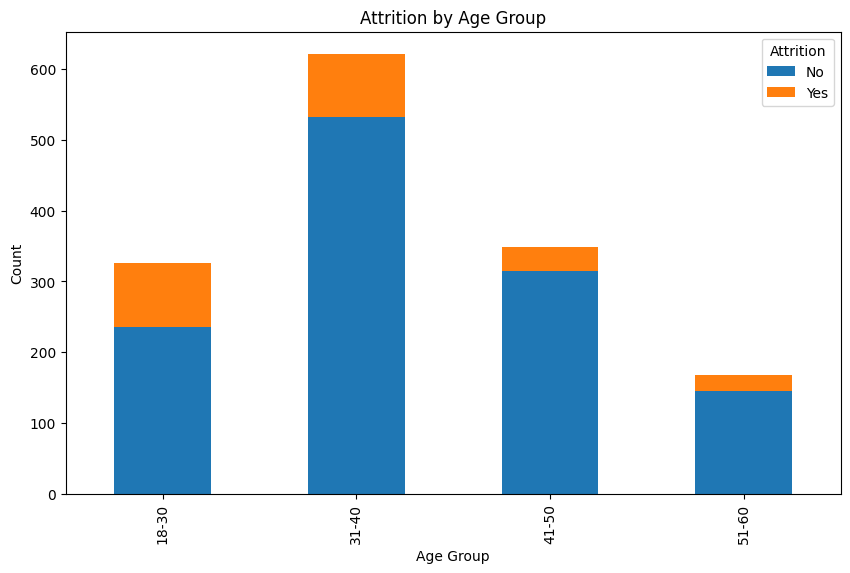

In [13]:
# Group the data by 'AgeGroup' and 'Attrition' and count the occurrences
age_attrition_counts = df.groupby(['AgeGroup', 'Attrition']).size().unstack()


# Create a bar chart to visualize attrition by age group
ax = age_attrition_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and a title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Attrition by Age Group')

# Show the legend
plt.legend(title='Attrition', loc='upper right')

# Display the plot
plt.show()

So based on this what can we conclude/deduct? Please discuss either in your groups or with yourself. Think about what other features we can use to add some degree of explainability to this, as that may be relevant further on in our analysis in terms of a bigger picture

*Interpretation: The bar plot tells us the most of the employees contain in the age group between 31 to 40. If we consider attrition "yes", then it is clearly vizualized that the age group 18-30 are prone to attrition from their job. Conversely we can see the less prone to attrition in the old-age employees between age group 51-60.*

## *Let's find out if people are too lazy to travel far for work*

![](https://aaubs.github.io/ds-master/media/M1-ass1-img3.png)

**Let's first print out the descriptive stats for DistanceFromHome specifically. We can do this using the .describe() method:**

In [14]:
print(df['DistanceFromHome'].describe())

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64


**Let's then try visualizing this feature as a plot using KDE (Kernel Density Estimation). Create a KDE-plot using the pyplot and/or seaborn library**

<ipython-input-15-b259a62fe3b4>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['DistanceFromHome'], color='green', shade=True)


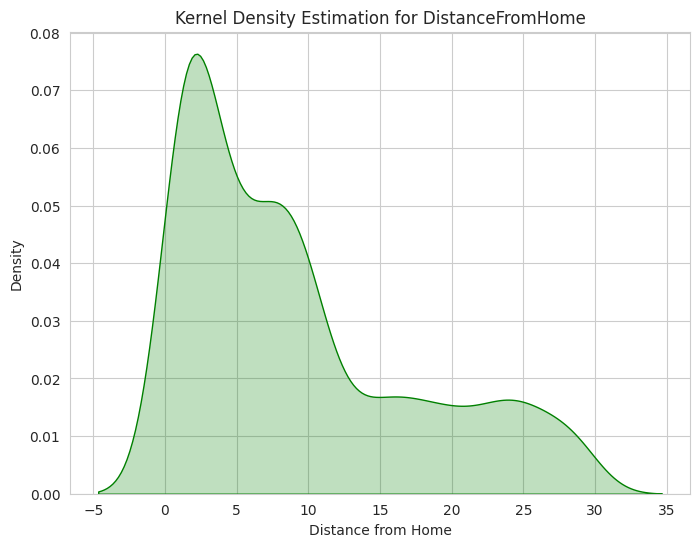

In [15]:
# Create a KDE plot using seaborn
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.kdeplot(df['DistanceFromHome'], color='green', shade=True)
plt.title('Kernel Density Estimation for DistanceFromHome')
plt.xlabel('Distance from Home')
plt.ylabel('Density')
plt.show()

**What can we deduct from this visualization? Is distance really an issue as far as attrition goes? Please discuss.**



*Interpretation: After observation, The KDE graph implies that relatively large number of employees live around 0 to 10 kilometers. The distance from home 0 suggests that a relatively large number of employees have a distance from home close to 0, possibly indicating that many employees live very close to their workplace. This KDE graph provides insights into the distribution of employee commute distances. It shows that the majority of employees have relatively short commutes, with a peak density around 0-5 units, and the density gradually decreases as the distance from home increases, indicating that fewer employees have longer commutes.*

## *Is it particular job roles that tends to leave the company?*

![](https://aaubs.github.io/ds-master/media/M1-ass1-img4.png)

**Let's try and visualize the attrition versus the job roles and find out if it's any particular job role(s) that are prone to suffer from attrition and churn. Let's first get the unique values for JobRole by using the .unique() method**

In [16]:
# Get unique values for the 'JobRole' column
unique_job_roles = df['JobRole'].unique()
print(unique_job_roles)


['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']


**Create a bar chart using seaborn (countplot) and/or pyplot that shows the difference between 'Yes' and 'No' for attrition between all the different JobRoles. You can make the plot vertical or horizontal by placing the JobRole on either the X- or Y-axis.**

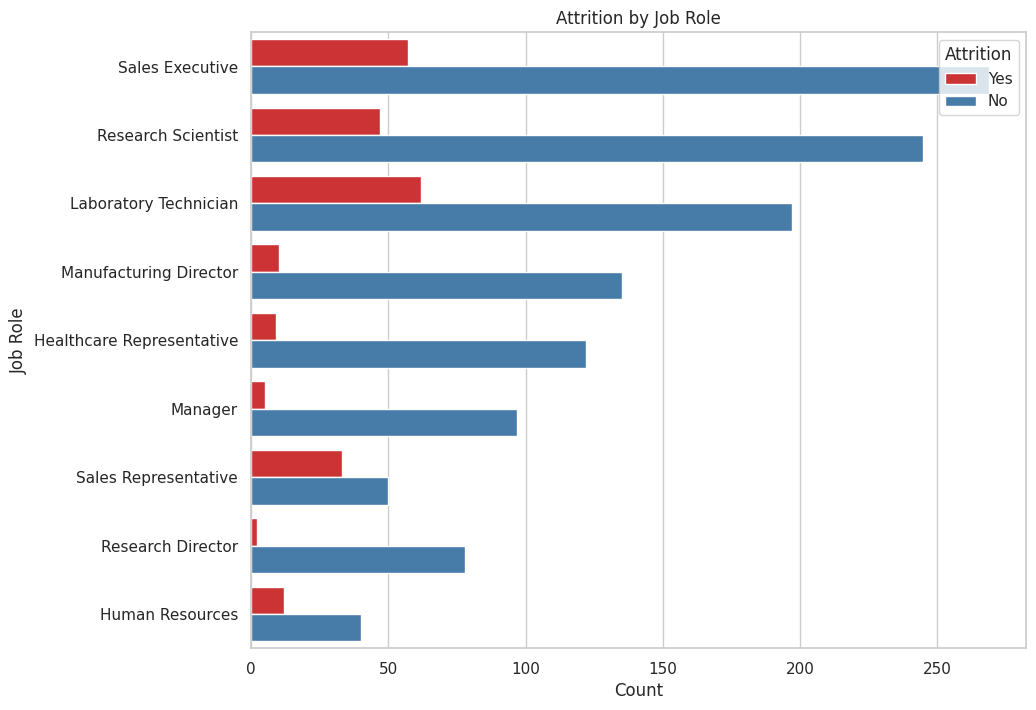

In [17]:
# Instantiate the pyplot figure. Adjust the figure size as needed
sns.set(style="whitegrid")

# Create a horizontal bar plot to visualize attrition by job role
plt.figure(figsize=(10, 8))
sns.countplot(y='JobRole', hue='Attrition', data=df, palette='Set1')

# Add labels and a title
plt.xlabel('Count')
plt.ylabel('Job Role')
plt.title('Attrition by Job Role')

# Show the legend
plt.legend(title='Attrition', loc='upper right')

# Display the plot
plt.show()

**What can we deduct from this visualization? Might there be better features to visualize? Please reflect/discuss within your groups**

*Interpretation: This horizontal bar plot allows to compare attrition rates among different job roles within the organization. Job roles like Sales Executive, Research Scientist, Healthcare Representative, Manager, Manufacturing Director, Research Director, and Human Resources seem to have relatively lower attrition rates with more 'No' cases than 'Yes' cases. In contrast, roles like Laboratory Technician and Sales Representative have higher attrition rates with more 'Yes' cases than 'No' cases. The visualization suggests that HR or management may want to focus on understanding the specific reasons for attrition in high-risk roles like "Laboratory Technician" and "Sales Representative." Targeted interventions, such as improving job satisfaction or addressing workload issues, could be implemented to reduce attrition in these roles.While job role is an important factor, other features such as "JobSatisfaction," "WorkLifeBalance," or "Income " could also provide valuable insights into attrition patterns.*

## *Do we maybe have some sort of gender difference going on within the company?*

Finally we want to see if there might be something going on in terms of the genders. It could be that there is something underlying going on in terms of inequality or similar, and this could be a possible reason for attrition.

**Using pyplot, create a pie chart showing the distribution of attrition == 'Yes' for males versus females. You will need to separate the 'Yes' and 'No' for attrition in order to do this. You can use the index of the separated dataframe as the labels by calling separated_df.index (separated_df being whatever you named the variable you saved the separated df to)**

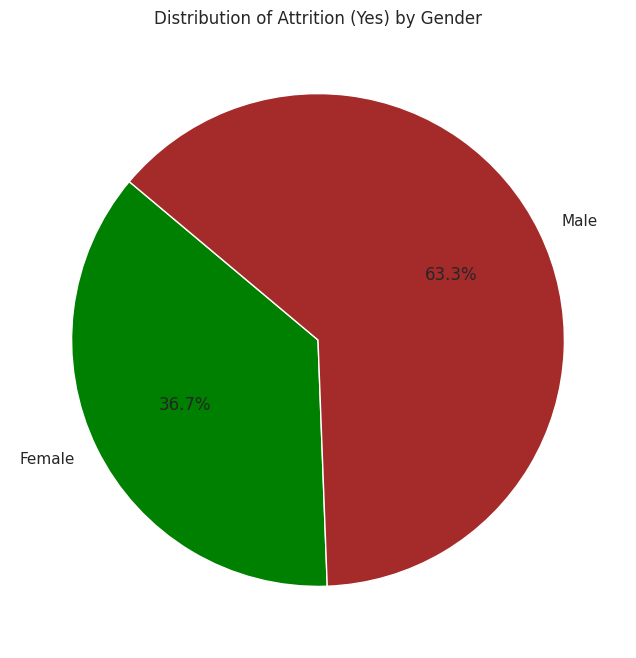

In [41]:
# Separate the dataframe based on Attrition ('Yes' and 'No')
attrition_yes_df = df[df['Attrition'] == 'Yes']
attrition_no_df = df[df['Attrition'] == 'No']

# Count the number of males and females in each group
attrition_yes_counts = attrition_yes_df['Gender'].value_counts()
attrition_no_counts = attrition_no_df['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))

# Add a title
labels = ['Female', 'Male']

# Display the plot
# Data for the pie chart
attrition_yes_values = [attrition_yes_counts.get('Female', 0), attrition_yes_counts.get('Male', 0)]
attrition_no_values = [attrition_no_counts.get('Female', 0), attrition_no_counts.get('Male', 0)]

# Plot the pie chart for Attrition == 'Yes'
plt.pie(attrition_yes_values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['green', 'brown'])
plt.title('Distribution of Attrition (Yes) by Gender')

# Display the plot
plt.show()

**Can we conclude anything based on this? Are there better ways to visualize this? Please discuss**

*Interpretation: There appears to be a significant gender disparity among employees. A notably higher percentage for “yes” attrition are seen in the male group of employee than the female group. While the pie chart provides just an initial overview, it's essential to conduct further investigation and analysis to understand the underlying factors contributing to this gender disparity in attrition. There are alternative visualization methods that can provide deeper insights, i.e. Box Plot, statistical tests such as chi-squared tests.*

# **Assignment 2 - Based on the available data, what are the possible reasons for these individuals to churn in the first place?**

![](https://aaubs.github.io/ds-master/media/M1-ass1-img5.png)

Alright, so now that you've analyzed which groups that seem to suffer from attrition, we need to figure out possible reasons for attrition. There are plenty of features that could potentially explain this, but let's stick to a just a few for now. Let's try and list a few possibilities:
- **Jobsatisfaction** is a quite obvious metric to check against **Attrition**. If people aren't satisfied with their position, they might leave to get more work satisfaction.
- We noticed that it was primarily the middle aged bins that suffered from attrition. This could indicate that they could've been at the company for a number of years, so **YearsAtCompany** or **YearsInCurrentRole** might be some interesting metrics to visualize against attrition.

## *Is a low job satisfaction the reasoning behind the attrition?*

**First let us get some information for the columns we're interested in to know what kind of values we're dealing with. In this case, let's print out the unique values for JobSatisfaction and Attrition**




In [19]:
# Print unique Attrition values
unique_attrition_values = df['Attrition'].unique()
print("Unique Attrition values:", unique_attrition_values)

Unique Attrition values: ['Yes' 'No']


In [20]:
# Print unique JobSatisfaction values
unique_job_satisfaction_values = df['JobSatisfaction'].unique()
print("Unique JobSatisfaction values:", unique_job_satisfaction_values)

Unique JobSatisfaction values: [4 2 3 1]


**Using the Altair library, create a stacked bar chart, with JobSatisfaction on the X-axis, and the employee counts on the Y-axis *( for this you can use count() )*. We also want to color the bar stacks based on Attrition.**

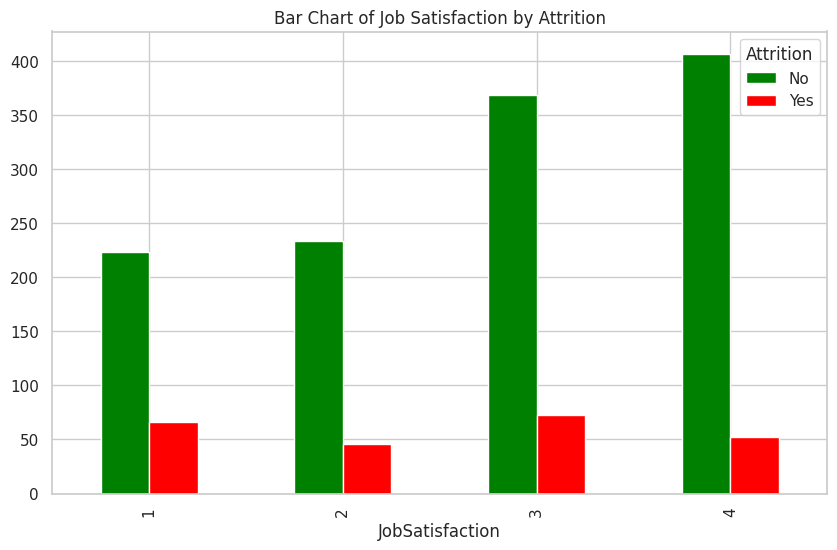

In [45]:
# Create a bar chart
satisfaction_attrition_counts = df.groupby(['JobSatisfaction', 'Attrition']).size().unstack()
satisfaction_attrition_counts.plot(kind='bar', stacked=False, color=['green', 'red'], figsize=(10, 6))
plt.title('Bar Chart of Job Satisfaction by Attrition')
plt.show()



**What does this indicate? Please discuss**

*Interpretation: Employees Job Satisfaction has beeen categorized into four segments; 1=Low, 2=Medium, 3=High, 4=Very High. It is a positive strength for the company that a significant number of employees are very highly satisfied. People who are just highly satisfied tend to be leave the job more compared to those who are very highly satified. The most significant attrition can be observed to those group of employees who are not satisfied with the job or can be thought those as "low satisfied employees". This bar graph clearly evident that "Dissatisfaction" with job is a major reason for the attrition.*

## *Are people quickly looking for opportunities elsewhere?*

**Using Altair, create a stacked bar chart with the count() on the Y-axis, and the YearsAtCompany on the X-axis. We want the bars to be colored based on Attrition.**

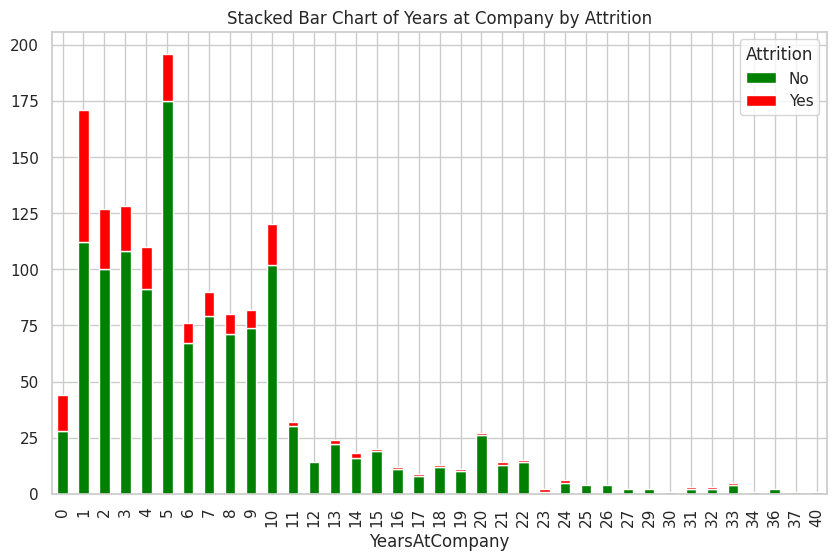

In [51]:
# Create a stacked bar chart
years_attrition_counts = df.groupby(['YearsAtCompany', 'Attrition']).size().unstack()
years_attrition_counts.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(10, 6))
plt.title('Stacked Bar Chart of Years at Company by Attrition')
plt.show()





**What can we deduct from this visual? Please discuss**

*Interpretation:The chart provides a visual representation of the distribution of employees based on their years of work at the company although most of them fall in the range 0 to 10 years. Employees working less than 2 years are prone to leave the job ("Yes" Attrition). Conversely, the more experiencd employee of this company has a higher retention probability (from 5 years and afterwards most of them are "No" attrition). Employees with less than 2 years of experience at the company may be more prone to leave for several reasons like-new job opportunity, mismatch with work culture, different career goals or interest, etc. Contrary, Employees with 5 or more years of experience may be more likely to stay for good career growth, corporate loyalty, peer relationship, etc.*

# **Assignment 3 - What incentives can we create to reduce the churn rate?**

So far we have identified some possible groups and causes for the attrition rates, now it's time that we find out how we might be able to reduce it

![](https://aaubs.github.io/ds-master/media/M1-ass1-img6.png)

## *Are we paying our employees enough for their commitment?*

Based on our analysis so far, it could indicate that people are seeking other opportunities fairly quickly, so let's see how this correlates with the feature 'MonthlyRate' as this should indicate how peoples can expect their pays to rise along their progress within the company
- **Using Altair, create a boxplot that shows how the MonthlyRate distribution changes as their JobLevel increases.**

<Axes: xlabel='JobLevel', ylabel='MonthlyRate'>

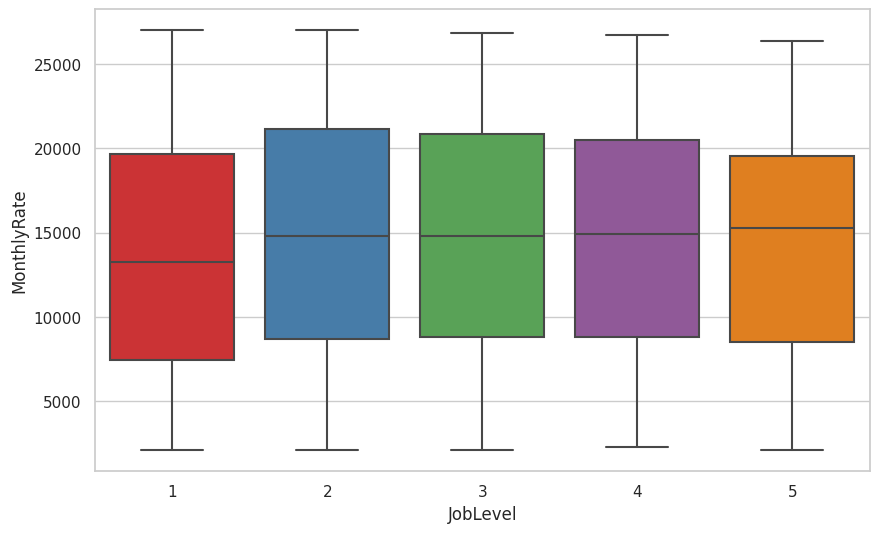

In [50]:
# Create a box plot of DailyRate by JobLevel
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='JobLevel', y='MonthlyRate', palette='Set1')


**What can we interpret from this visual? Please discuss**

*Interpretation: Employee's level of job categorized into 5 segments-(1=Entry, 2=Intermediary, 3=Experienced, 4=Advaned, 5=Expert). The above boxplot, however, shows a clear imbalance and disparities because the expert-level employee receives the same monthly income that entry-level employees do. This may lead to higher possibility for the attrition.*

Is it the same case for the distribution of DailyRate?
- **Create another boxplot that shows the distribution of DailyRate across JobLevel**

<Axes: xlabel='JobLevel', ylabel='DailyRate'>

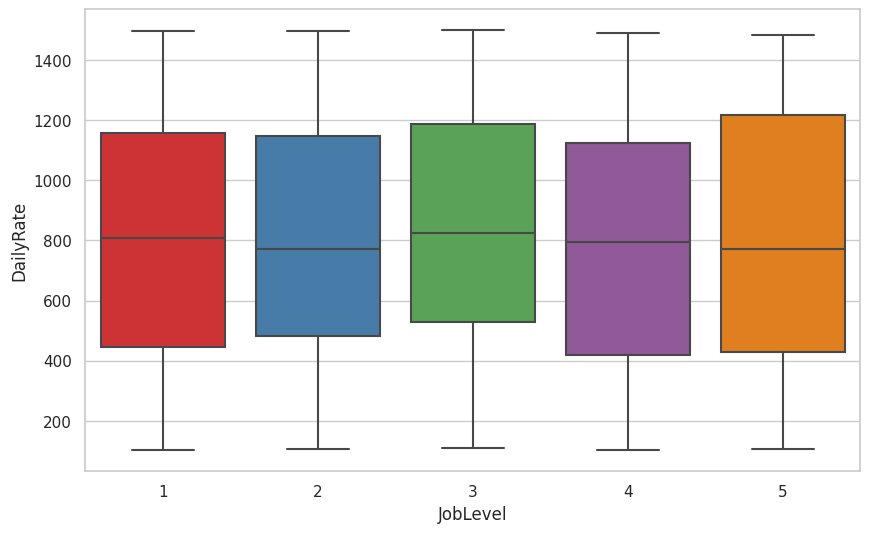

In [49]:
# Create a box plot of DailyRate by JobLevel
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='JobLevel', y='DailyRate', palette='Set1')


**What can we interpret from this visual? (It may make sense to take the previous one into consideration, in terms of performing further analysis as to some underlying causes)**

*Interpretation: The boxplot with DailyRate converse the previous statement. We can see here the experts are paid higher DailyRate which concise the statement that the Daily or Monthly rate is not the final fact to identify the "remuneration fact for attrition" because payment rates might be lower to higher based on their JobLevel from entry to expert but the fact is it requires to know how long they usually work per day or month. We believe that, this visual plot doee not make any sensible conclusion to the attition effect whereas, the HourlyRate can be suggested to get a consice interpretation in this situation.*

# **The End**

**You made it to the end! Good job!**

![](https://aaubs.github.io/ds-master/media/M1-ass1-img7.png)

**I highly encourage you to keep playing around with this dataset, or other similar datasets that have a good amount of features to perform EDA and visualizations with. It's a good way to sharpen those coding skillz, and will help you perform in-depth analysis in your future careers. As you can see, Altair, pyplot and Seaborn are strong visualization libraries, and having knowledge of how best to deploy these visualizations, you can add some *KAPOW* to your analysis. Kaggle.com provides plenty of cool datasets for a vast variety of analysis and applications**